In [6]:
# Libraries
import numpy as np
import pandas as pd
import scipy.odr as odr
import os
import math
import pdb
import matplotlib.pyplot as plt
import numpy.linalg as la

# def tls(X,y):
    
#     X = np.array([[i, 1] for i in X])
#     y = np.array(y)

#     n = np.array(X).shape[1] 
    
#     Z = np.vstack((X.T,y)).T
#     U, s, Vt = la.svd(Z, full_matrices=True)
    
#     V = Vt.T
#     Vxy = V[:n,n:]
#     Vyy = V[n:,n:]
#     a_tls = - Vxy  / Vyy # total least squares soln
    
#     return a_tls

# Constants
data_dir = '../Data/'
metadata_file = '../Data/Dances_Metadata.csv'
metadata = pd.read_csv(metadata_file)

locs_orig_dir = data_dir + 'Locations/Original/'
locs_orig_files = os.listdir(locs_orig_dir)
#locs_orig_files.remove('.DS_Store')
locs_orig_files.sort()

runs_dir = data_dir + '/Runs/'
runs_files = os.listdir(runs_dir)
#runs_files.remove('.DS_Store')
runs_files.sort()

def tls(x, y):
    def f(B, x):
        return B[0]*x + B[1]
    linear = odr.Model(f)
    data = odr.Data(x, y)
    fitodr = odr.ODR(data, linear, beta0=[0.1,0.1])
    output = fitodr.run()
    return output.beta

def angle_from_slope(slope, x_0, x_f):
    in_slope_direction = True if x_f[0] - x_0[0] > 0 else False
    if slope > 0 and in_slope_direction:
        return np.arctan(1/slope)
    elif slope > 0 and not in_slope_direction:
        return np.arctan(1/slope) - math.pi
    elif slope < 0 and in_slope_direction:
        return math.pi + np.arctan(1/slope)
    elif slope < 0 and not in_slope_direction:
        return np.arctan(1/slope)
        
class WaggleDance():
    def __init__(self, locs_dir, filename): 
        self.locs_dir = locs_dir
        self.filename = filename
        self.k = 0
        self.dance = pd.read_csv(locs_dir + filename)[['x', 'y']].to_numpy()
        self.classifications = pd.read_csv(locs_dir + filename)[['dance_movement']].to_numpy().flatten()
        self.pred_classifications = pd.read_csv(locs_dir + filename)[['Predictions']].to_numpy().flatten()
    
    def getcurrentloc(self):
        if (self.k < len(self.dance)):
            x_k = self.dance[self.k]
            self.k += 1
            return x_k
        return np.array([])
        
    def reset(self):
        self.k = 0

def f(B, x):
    return B[0]*x + B[1]

In [45]:
def get_runs_from_dance(dance):
#     pdb.set_trace()
    k = 0
    x_k = dance.getcurrentloc()
    ret = []
    curr_dance = []
    while (len(x_k) != 0):
        if dance.pred_classifications[k] == 1: 
            curr_dance.append(x_k)
        elif dance.pred_classifications[k] == -1:
            pass
        else:
            if len(curr_dance) == 0:
                curr_dance.clear()
            else:
                ret.append(curr_dance.copy())
                curr_dance.clear()
        k += 1
        x_k = dance.getcurrentloc()
    
    if len(curr_dance) != 0:
        ret.append(curr_dance.copy())
        curr_dance.clear()
        
    return ret

def plot_run_with_fit(run_i):
    data_x = [i[0] for i in run_i]
    data_y = [-i[1] for i in run_i]
    
    midpts_x = []
    midpts_y = []
    
    for i in range(1, len(data_x)):
        midpts_x.append((data_x[i] + data_x[i - 1]) / 2)
        midpts_y.append((data_y[i] + data_y[i - 1]) / 2)
        
    if(len(midpts_x) == 0):
        return None
    
    linear = odr.Model(f)
    data = odr.Data(data_x, data_y)
    testodr = odr.ODR(data, linear, beta0=[0.1,0.1])
    output = testodr.run()
    
    linear_midpt = odr.Model(f)
    data_midpt = odr.Data(midpts_x, midpts_y)
    testodr_midpt = odr.ODR(data_midpt, linear_midpt, beta0=[0.1,0.1])
    output_midpt = testodr_midpt.run()
    
    y = [f(output.beta, i) for i in range(round(np.array(data_x).min()),round(np.array(data_x).max()))]
    x = [i for i in range(round(np.array(data_x).min()),round(np.array(data_x).max()))]
    midpt_fit_y = [f(output_midpt.beta, i) for i in range(round(np.array(midpts_x).min()),round(np.array(midpts_x).max()))]
    midpt_fit_x = [i for i in range(round(np.array(midpts_x).min()),round(np.array(midpts_x).max()))]
    plt.xlim(np.min(data_x) - 10, np.max(data_x) + 10)
    plt.ylim(np.min(data_y) - 10, np.max(data_y) + 10)
    plt.scatter(data_x, data_y)
    plt.plot(data_x, data_y)
#     plt.scatter(midpts_x, midpts_y)
#     plt.plot(midpts_x, midpts_y)
#     plt.plot(x,y)
    plt.plot(midpt_fit_x, midpt_fit_y)
    plt.savefig('pics/figure'+ str(k) + '.png')
    plt.show()
    plt.clf()
    return output_midpt.beta
    
#     plt.xlim(np.min(data_x) + 10, np.max(data_x) + 10)
#     plt.ylim(np.min(data_y) + 10, np.max(data_y) + 10)
#     plt.scatter(data_x, data_y)
#     plt.plot(x,y)
#     plt.show()
#     plt.clf()

In [8]:
curr_dance = dances[0]

NameError: name 'dances' is not defined

In [10]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, color='green')

In [14]:
plt.plot(curr_dance.dance[:, 0], curr_dance.dance[:, 1])
plt.xlabel('x')
plt.ylabel('y', rotation=0)

runs = curr_dance.dance[curr_dance.pred_classifications == 1]
returns = curr_dance.dance[curr_dance.pred_classifications == 0]
other_returns = curr_dance.dance[curr_dance.pred_classifications == -1]

plt.plot(runs[:19, 0], runs[:19, 1], color='tab:blue')
plt.plot(runs[:19, 0], runs[:19, 1], linestyle='None', marker='.', color='tab:orange')
plt.plot(runs[19:(19 + 24), 0], runs[19:(19 + 24), 1], color='tab:blue')
plt.plot(runs[19:(19 + 24), 0], runs[19:(19 + 24), 1], linestyle='None', marker='.', color='tab:orange')
plt.plot(runs[(19 + 24):, 0], runs[(19 + 24):, 1], color='tab:blue')
plt.plot(runs[(19 + 24):, 0], runs[(19 + 24):, 1], linestyle='None', marker='.', color='tab:orange')

abline(-8.46682467060643, 3000)

plt.plot(returns[:, 0], returns[:, 1], linestyle='None', marker='.', color='purple')
plt.plot(other_returns[:, 0], other_returns[:, 1], linestyle='None', marker='.', color='purple')

plt.xlim(np.min(curr_dance.dance[:, 0]) - 10, np.max(curr_dance.dance[:, 0]) + 10)
plt.ylim(np.min(curr_dance.dance[:, 1]) - 10, np.max(curr_dance.dance[:, 1]) + 10)

plt.savefig('/Users/parkermurray/Downloads/OkinawaFigure.pdf')
plt.show()

NameError: name 'curr_dance' is not defined

Plots for dance 0


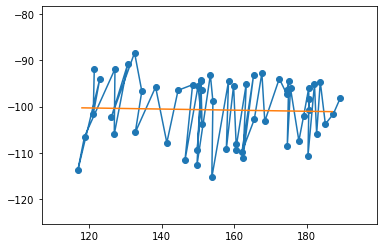

Run angle pre-adjustment: -89.31753583187306
Run direction: against
Run angle: -89.31753583187306
Run slope: -0.011911810106496059


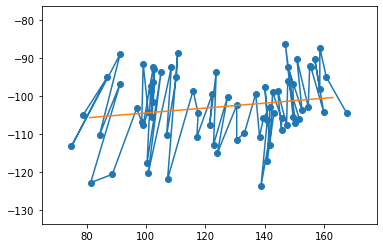

Run angle pre-adjustment: 86.3215835739264
Run direction: against
Run angle: -93.6784164260736
Run slope: 0.0642888286251406


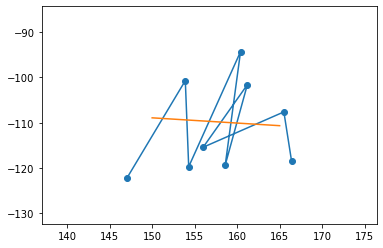

Run angle pre-adjustment: -83.40890574500357
Run direction: with
Run angle: -83.40890574500357
Run slope: -0.1155464350685707
Plots for dance 1


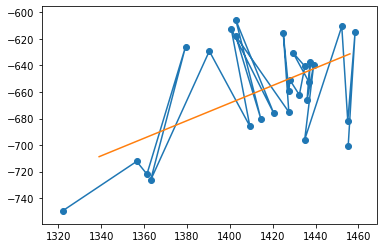

Run angle pre-adjustment: 56.50220303609301
Run direction: against
Run angle: -123.49779696390698
Run slope: 0.6618302676107931


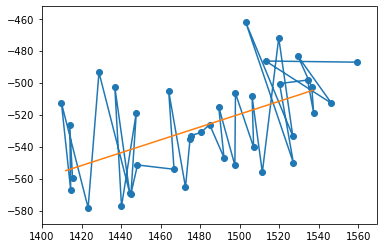

Run angle pre-adjustment: 68.12108964081996
Run direction: with
Run angle: -111.87891035918004
Run slope: 0.4015699190436446


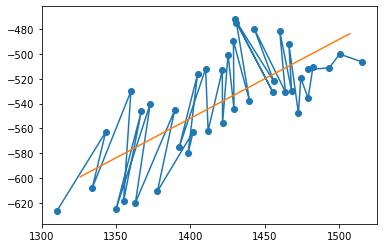

Run angle pre-adjustment: 57.47633580411529
Run direction: against
Run angle: -122.5236641958847
Run slope: 0.6376510587210505


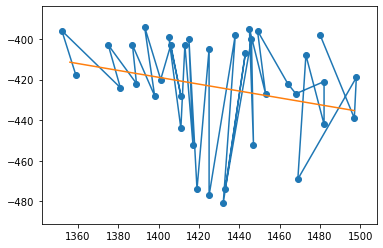

Run angle pre-adjustment: -80.41487565335157
Run direction: with
Run angle: -80.41487565335157
Run slope: -0.16887029501867973


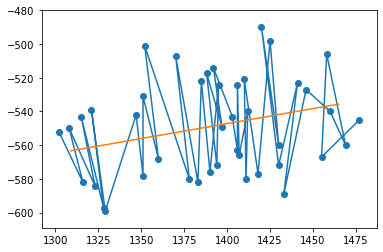

Run angle pre-adjustment: 79.92633581351001
Run direction: against
Run angle: -100.07366418648999
Run slope: 0.17765293804934787


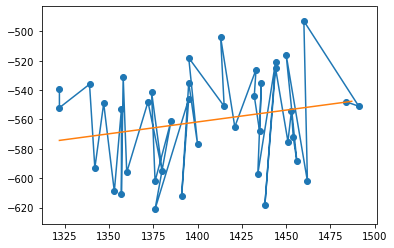

Run angle pre-adjustment: 80.84049954054227
Run direction: against
Run angle: -99.15950045945773
Run slope: 0.16123934822267522
Plots for dance 2


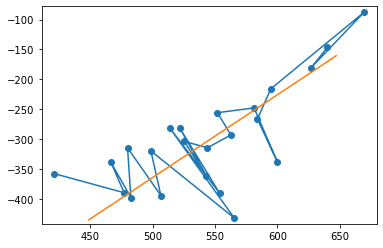

Run angle pre-adjustment: 35.7889729579711
Run direction: with
Run angle: 35.7889729579711
Run slope: 1.3870967997724544


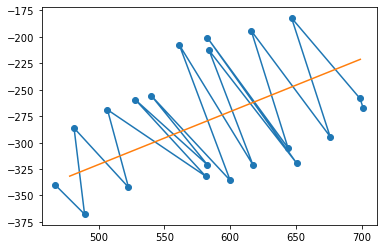

Run angle pre-adjustment: 63.46893019350243
Run direction: with
Run angle: 63.46893019350243
Run slope: 0.49925886119171264


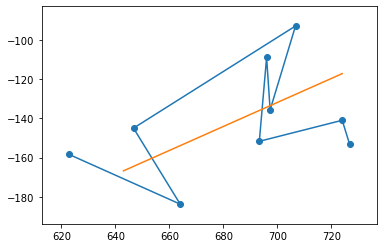

Run angle pre-adjustment: 58.5742200181884
Run direction: with
Run angle: 58.5742200181884
Run slope: 0.6110203680667077


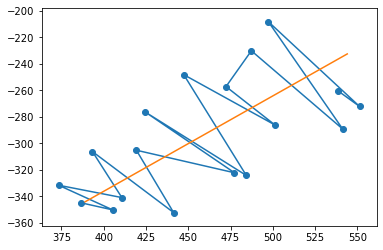

Run angle pre-adjustment: 54.26584252058885
Run direction: with
Run angle: 54.26584252058885
Run slope: 0.7194772692470914


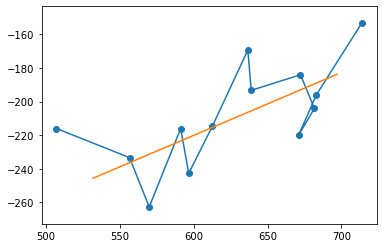

Run angle pre-adjustment: 69.45258697312687
Run direction: with
Run angle: 69.45258697312687
Run slope: 0.37482816293417465


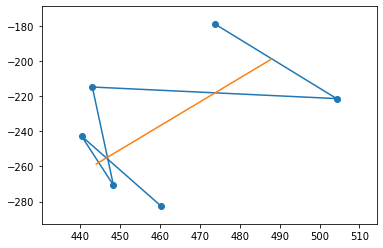

Run angle pre-adjustment: 36.30351895149164
Run direction: against
Run angle: 36.30351895149164
Run slope: 1.361159813103537
Plots for dance 3


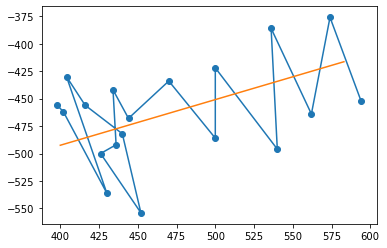

Run angle pre-adjustment: 67.42990212598741
Run direction: with
Run angle: 67.42990212598741
Run slope: 0.4156476374231594


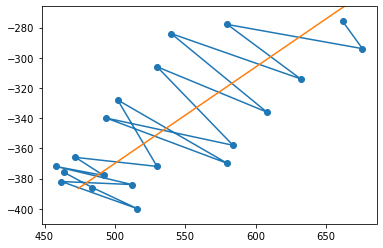

Run angle pre-adjustment: 57.47806584257743
Run direction: with
Run angle: 57.47806584257743
Run slope: 0.637608587472394


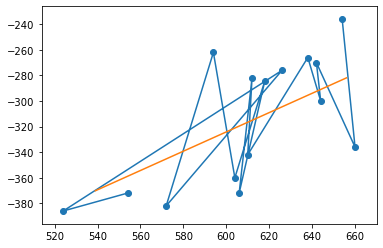

Run angle pre-adjustment: 52.96961442627305
Run direction: against
Run angle: 52.96961442627305
Run slope: 0.7543858544935416
Plots for dance 4


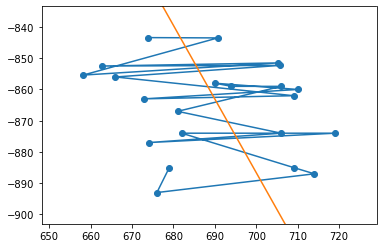

Run angle pre-adjustment: -22.972892152045734
Run direction: with
Run angle: 157.02710784795426
Run slope: -2.3589547869845857


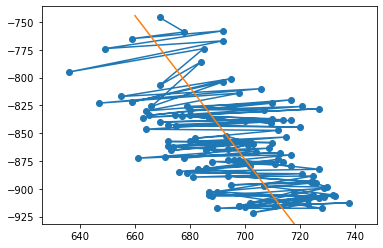

Run angle pre-adjustment: -17.224591576474882
Run direction: against
Run angle: 162.7754084235251
Run slope: -3.2255764648915175


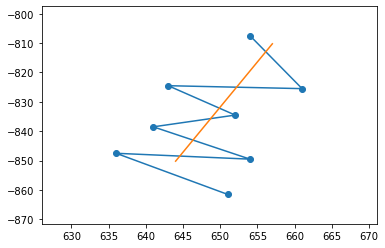

Run angle pre-adjustment: 18.030631037592705
Run direction: against
Run angle: 18.030631037592705
Run slope: 3.0720941988040837


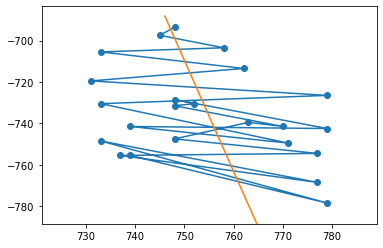

Run angle pre-adjustment: -10.552957678472202
Run direction: with
Run angle: -10.552957678472202
Run slope: -5.367823543511322
Plots for dance 5


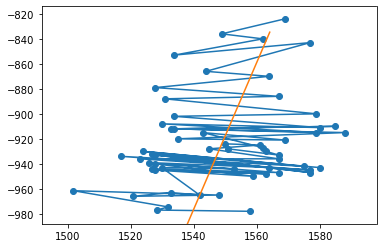

Run angle pre-adjustment: 9.64504395287129
Run direction: against
Run angle: 9.64504395287129
Run slope: 5.884218483444686


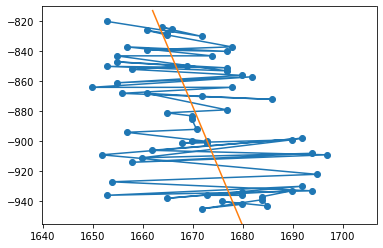

Run angle pre-adjustment: -7.157189202947626
Run direction: with
Run angle: -7.157189202947626
Run slope: -7.9636642775728355
Plots for dance 6


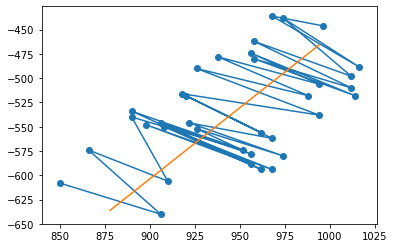

Run angle pre-adjustment: 34.277351691957364
Run direction: with
Run angle: 34.277351691957364
Run slope: 1.46719065906397


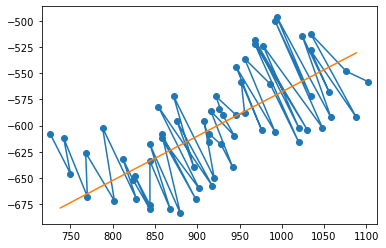

Run angle pre-adjustment: 67.03718179716934
Run direction: with
Run angle: 67.03718179716934
Run slope: 0.42370915609166987


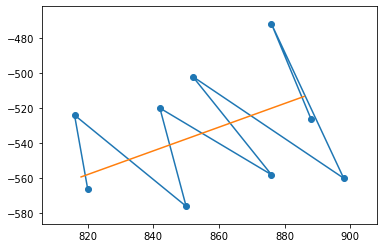

Run angle pre-adjustment: 55.96410629558638
Run direction: with
Run angle: 55.96410629558638
Run slope: 0.6754203824406231
Plots for dance 7


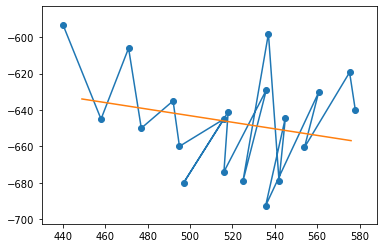

Run angle pre-adjustment: -79.77065895088639
Run direction: against
Run angle: -79.77065895088639
Run slope: -0.18045712473080808


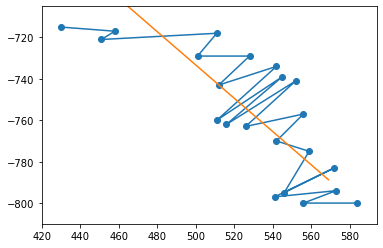

Run angle pre-adjustment: -51.22146927060665
Run direction: with
Run angle: -51.22146927060665
Run slope: -0.8034038882918403


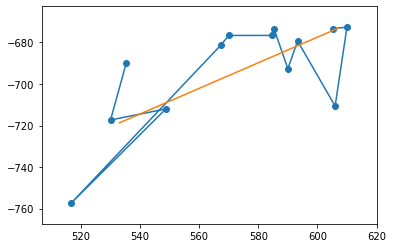

Run angle pre-adjustment: 58.37694504839402
Run direction: against
Run angle: -121.62305495160597
Run slope: 0.6157589199216351


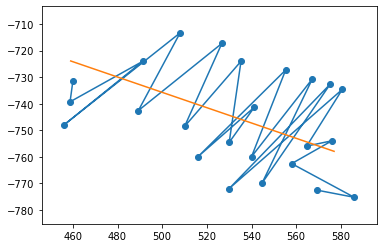

Run angle pre-adjustment: -73.89461288706812
Run direction: against
Run angle: -73.89461288706812
Run slope: -0.28873702745225543


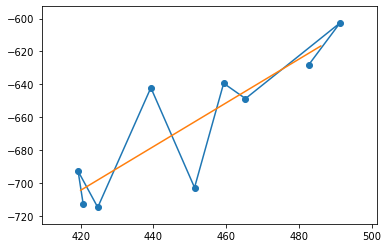

Run angle pre-adjustment: 36.994727143887246
Run direction: against
Run angle: 36.994727143887246
Run slope: 1.3272989483113418


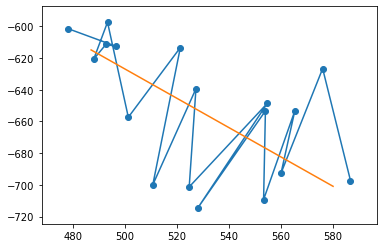

Run angle pre-adjustment: -47.20231935194997
Run direction: with
Run angle: -47.20231935194997
Run slope: -0.9259349640545999


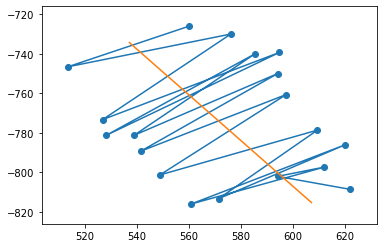

Run angle pre-adjustment: -40.857739221286835
Run direction: against
Run angle: -40.857739221286835
Run slope: -1.156153626815402
Plots for dance 8


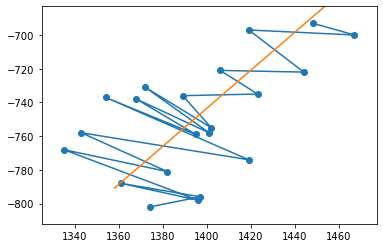

Run angle pre-adjustment: 41.52190656468592
Run direction: against
Run angle: 41.52190656468592
Run slope: 1.1294239542992273


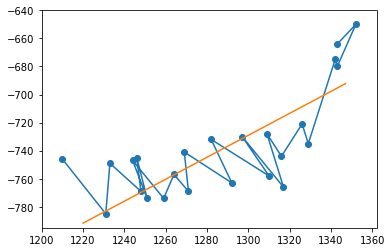

Run angle pre-adjustment: 51.94246131311882
Run direction: with
Run angle: 51.94246131311882
Run slope: 0.7829041315318146


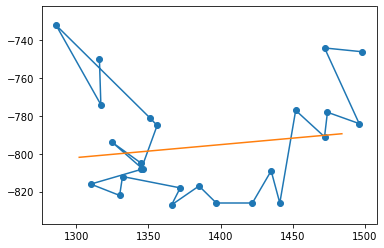

Run angle pre-adjustment: 86.08187691944867
Run direction: against
Run angle: -93.91812308055133
Run slope: 0.06849094504975554


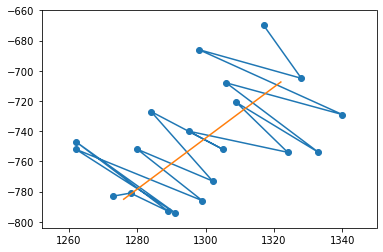

Run angle pre-adjustment: 30.64486028996369
Run direction: against
Run angle: 30.64486028996369
Run slope: 1.6878900763679177


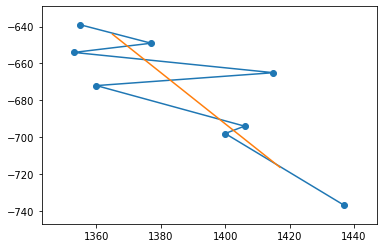

Run angle pre-adjustment: -35.765447990171964
Run direction: against
Run angle: 144.23455200982804
Run slope: -1.388298059132545


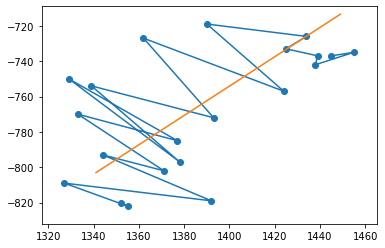

Run angle pre-adjustment: 50.33824989446799
Run direction: against
Run angle: 50.33824989446799
Run slope: 0.8290888935996541


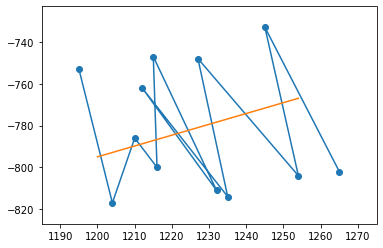

Run angle pre-adjustment: 62.602297809141
Run direction: with
Run angle: 62.602297809141
Run slope: 0.5182998869989217
Plots for dance 9


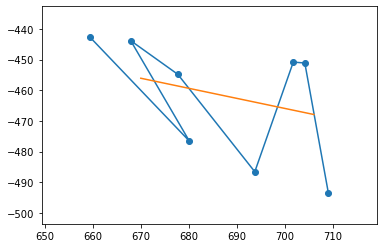

Run angle pre-adjustment: -71.78052182949965
Run direction: against
Run angle: -71.78052182949965
Run slope: -0.3291600203401003


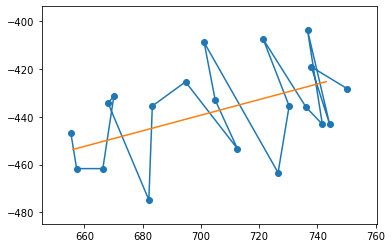

Run angle pre-adjustment: 71.9247264101967
Run direction: against
Run angle: -108.0752735898033
Run slope: 0.32637278793111585


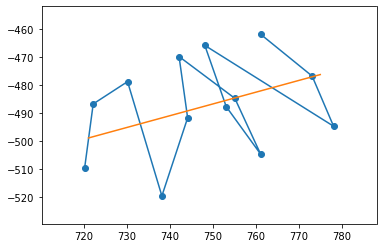

Run angle pre-adjustment: 67.16224055426959
Run direction: with
Run angle: -112.83775944573041
Run slope: 0.4211369871350744


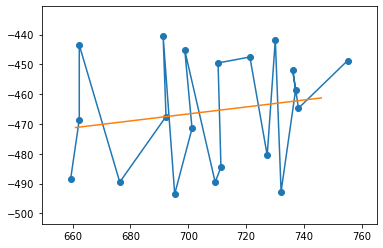

Run angle pre-adjustment: 83.32553192628434
Run direction: with
Run angle: -96.67446807371566
Run slope: 0.11702125937402869


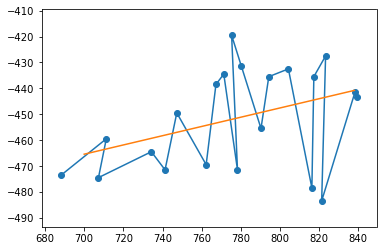

Run angle pre-adjustment: 79.87224268227352
Run direction: with
Run angle: -100.12775731772648
Run slope: 0.17862700138717014


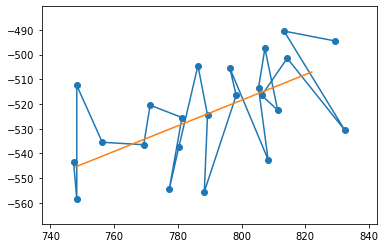

Run angle pre-adjustment: 62.60515660594595
Run direction: with
Run angle: -117.39484339405405
Run slope: 0.5182365895749148


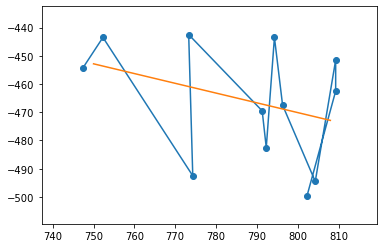

Run angle pre-adjustment: -70.94496400353499
Run direction: against
Run angle: -70.94496400353499
Run slope: -0.34540241381472225


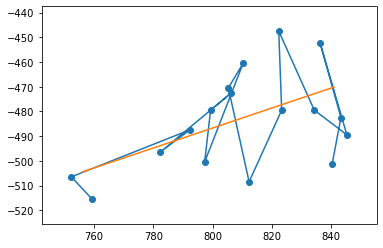

Run angle pre-adjustment: 67.99189786973625
Run direction: against
Run angle: -112.00810213026375
Run slope: 0.4041907272676249


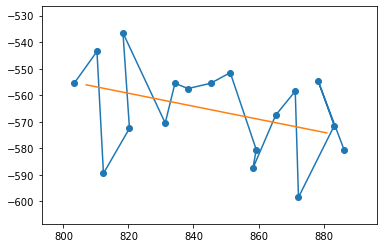

Run angle pre-adjustment: -76.23320398724978
Run direction: against
Run angle: -76.23320398724978
Run slope: -0.2450091640330363


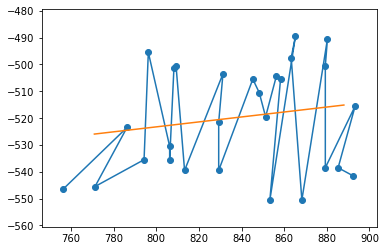

Run angle pre-adjustment: 84.72219945237885
Run direction: against
Run angle: -95.27780054762115
Run slope: 0.0923764213652621
Plots for dance 10


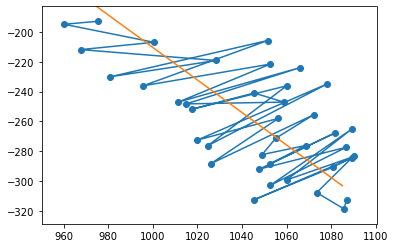

Run angle pre-adjustment: -42.50978014778221
Run direction: with
Run angle: -42.50978014778221
Run slope: -1.0909345840755564


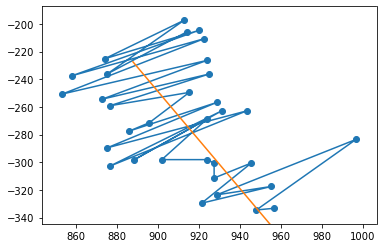

Run angle pre-adjustment: -29.667152753032394
Run direction: against
Run angle: -29.667152753032394
Run slope: -1.7555243834798808


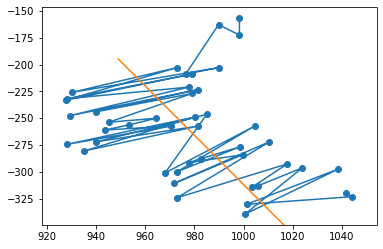

Run angle pre-adjustment: -23.52919112846364
Run direction: against
Run angle: -23.52919112846364
Run slope: -2.296642028685945


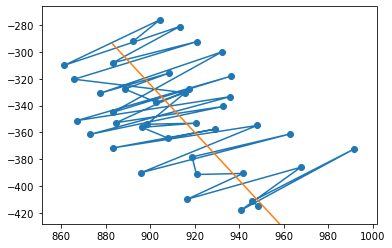

Run angle pre-adjustment: -29.174365561754346
Run direction: against
Run angle: -29.174365561754346
Run slope: -1.7911706239339955


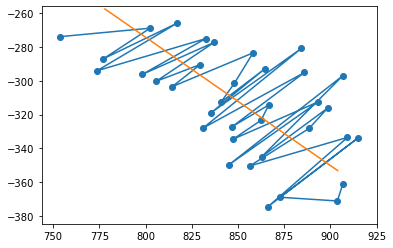

Run angle pre-adjustment: -52.81190210610093
Run direction: with
Run angle: -52.81190210610093
Run slope: -0.7587139508501797


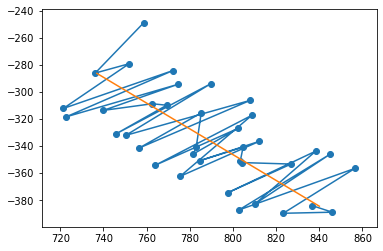

Run angle pre-adjustment: -46.37011187674906
Run direction: against
Run angle: -46.37011187674906
Run slope: -0.9532823260925145


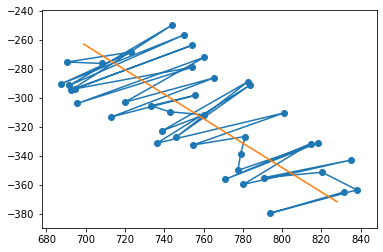

Run angle pre-adjustment: -49.8020734799758
Run direction: with
Run angle: -49.8020734799758
Run slope: -0.8450034884407754


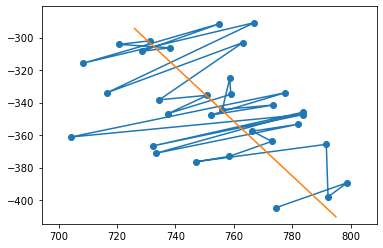

Run angle pre-adjustment: -30.77325779850954
Run direction: against
Run angle: -30.77325779850954
Run slope: -1.679297173036196


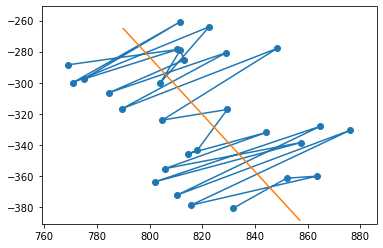

Run angle pre-adjustment: -28.444356642050373
Run direction: with
Run angle: -28.444356642050373
Run slope: -1.8460439808554299


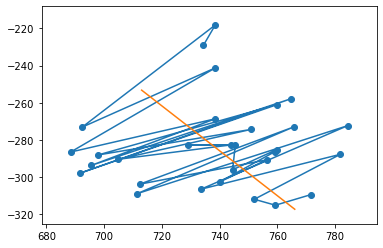

Run angle pre-adjustment: -39.596072886260174
Run direction: against
Run angle: -39.596072886260174
Run slope: -1.2089610562132707


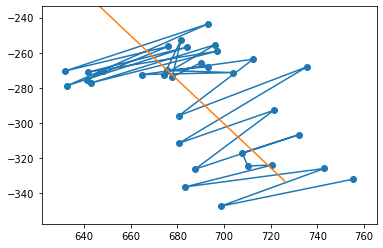

Run angle pre-adjustment: -38.5737169126275
Run direction: with
Run angle: -38.5737169126275
Run slope: -1.2538576028368666


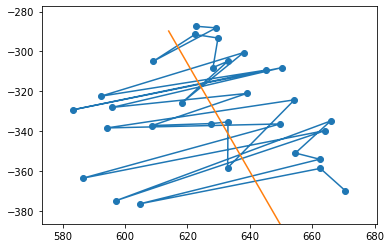

Run angle pre-adjustment: -20.24017555801915
Run direction: with
Run angle: -20.24017555801915
Run slope: -2.7120506032102973


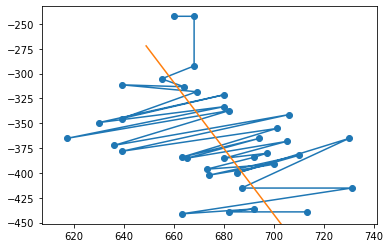

Run angle pre-adjustment: -16.756506358240003
Run direction: against
Run angle: -16.756506358240003
Run slope: -3.3212695213004086


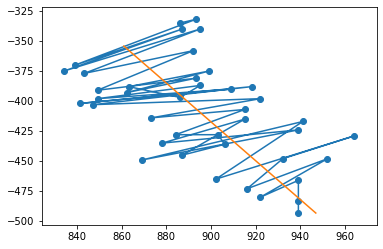

Run angle pre-adjustment: -31.75022294039802
Run direction: against
Run angle: -31.75022294039802
Run slope: -1.6159679408063488


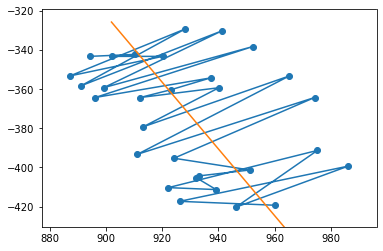

Run angle pre-adjustment: -30.403584892569707
Run direction: with
Run angle: -30.403584892569707
Run slope: -1.7042144205790302


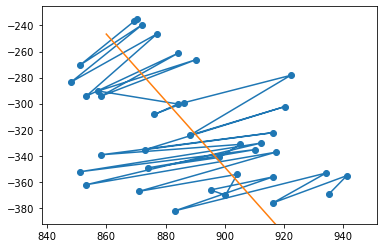

Run angle pre-adjustment: -21.36203074249361
Run direction: with
Run angle: -21.36203074249361
Run slope: -2.5566852448029342


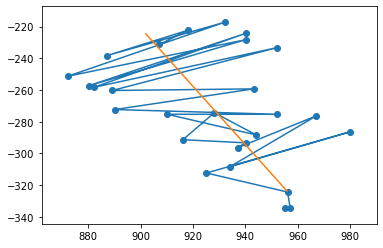

Run angle pre-adjustment: -28.591565466119125
Run direction: against
Run angle: -28.591565466119125
Run slope: -1.8347723495258492


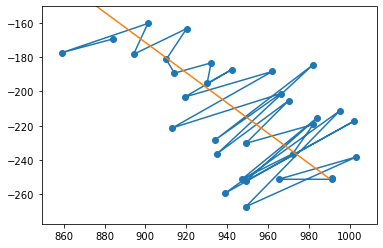

Run angle pre-adjustment: -48.575804856362645
Run direction: with
Run angle: -48.575804856362645
Run slope: -0.8823693783611111


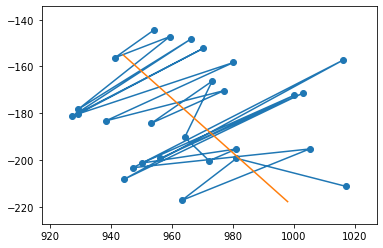

Run angle pre-adjustment: -40.722294777809964
Run direction: with
Run angle: -40.722294777809964
Run slope: -1.1616926003221624


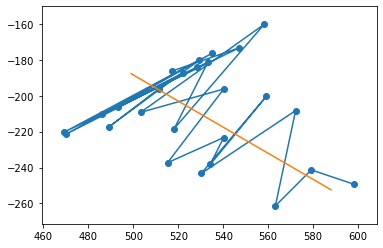

Run angle pre-adjustment: -54.02461573793632
Run direction: against
Run angle: -54.02461573793632
Run slope: -0.7258863231723014


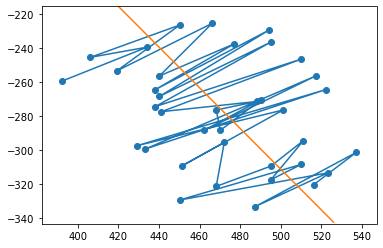

Run angle pre-adjustment: -39.84824781063678
Run direction: with
Run angle: -39.84824781063678
Run slope: -1.1981841905005532


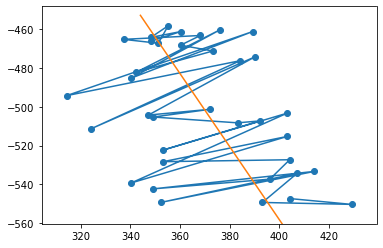

Run angle pre-adjustment: -28.022526374184856
Run direction: with
Run angle: -28.022526374184856
Run slope: -1.8789439671779324


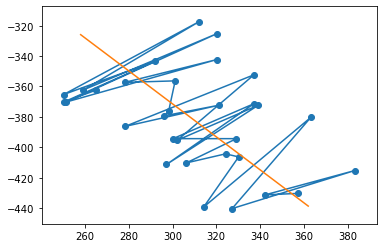

Run angle pre-adjustment: -42.692045600908756
Run direction: with
Run angle: -42.692045600908756
Run slope: -1.083991536342753


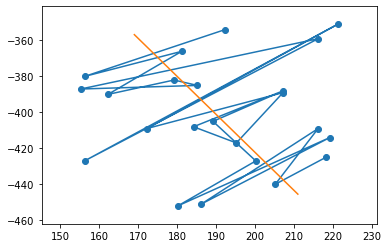

Run angle pre-adjustment: -25.324678474110442
Run direction: against
Run angle: -25.324678474110442
Run slope: -2.1131601305753427


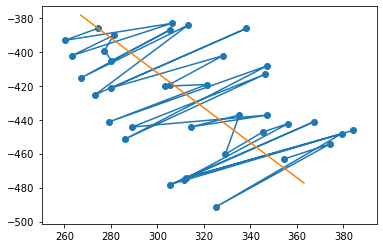

Run angle pre-adjustment: -44.17899279754314
Run direction: with
Run angle: -44.17899279754314
Run slope: -1.029077203235537


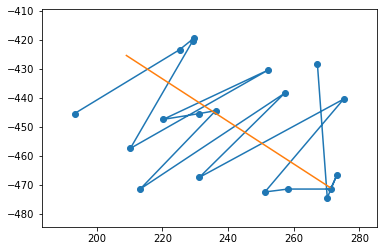

Run angle pre-adjustment: -53.76272967934042
Run direction: with
Run angle: -53.76272967934042
Run slope: -0.7328887699623784
Plots for dance 11


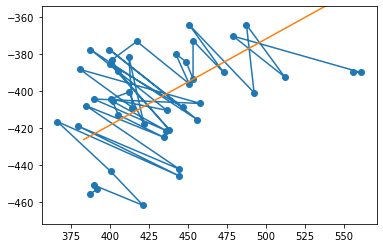

Run angle pre-adjustment: 65.00848874154102
Run direction: with
Run angle: 65.00848874154102
Run slope: 0.46612729855824403


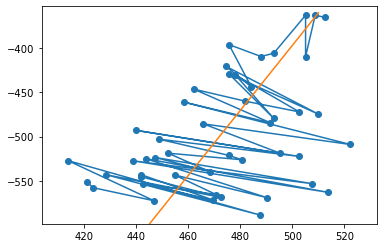

Run angle pre-adjustment: 15.21551315487927
Run direction: with
Run angle: 15.21551315487927
Run slope: 3.6766767215115554


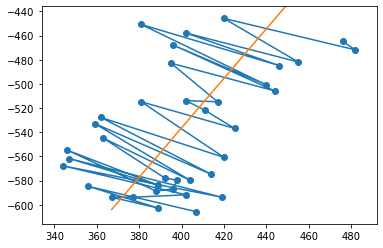

Run angle pre-adjustment: 26.0134859504006
Run direction: with
Run angle: 26.0134859504006
Run slope: 2.049079604651003


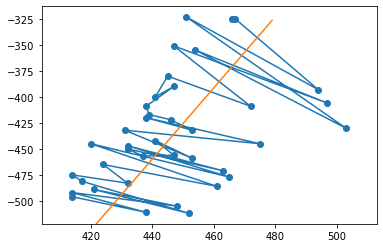

Run angle pre-adjustment: 16.306492184228553
Run direction: with
Run angle: 16.306492184228553
Run slope: 3.4182954394324168


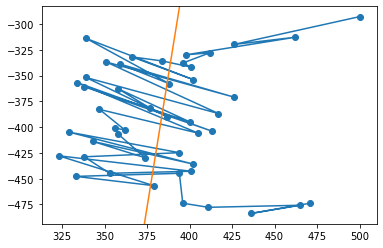

Run angle pre-adjustment: 5.602465940538353
Run direction: with
Run angle: 5.602465940538353
Run slope: 10.194271204789132


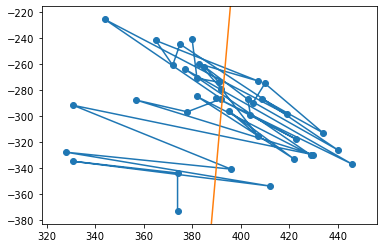

Run angle pre-adjustment: 2.689410356430406
Run direction: against
Run angle: 2.689410356430406
Run slope: 21.288567482563312


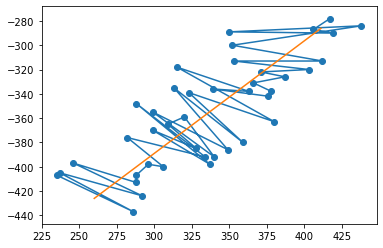

Run angle pre-adjustment: 47.169700916866034
Run direction: with
Run angle: 47.169700916866034
Run slope: 0.926992912676551


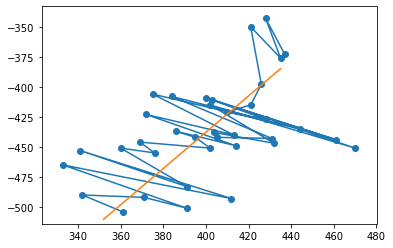

Run angle pre-adjustment: 33.49430469888509
Run direction: against
Run angle: 33.49430469888509
Run slope: 1.511161541116601
Plots for dance 12


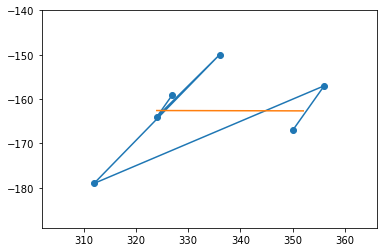

Run angle pre-adjustment: -89.84038747378291
Run direction: with
Run angle: 90.15961252621709
Run slope: -0.0027857713162268752


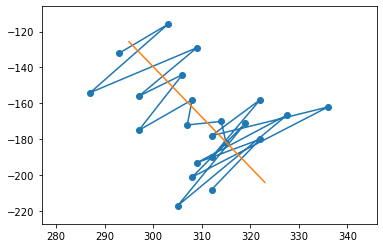

Run angle pre-adjustment: -19.679852262842015
Run direction: with
Run angle: 160.32014773715798
Run slope: -2.795989284877666


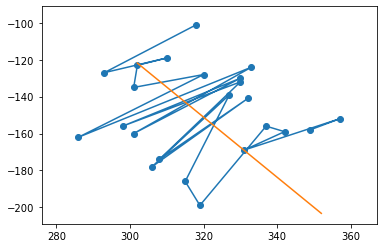

Run angle pre-adjustment: -31.512486080163313
Run direction: with
Run angle: 148.4875139198367
Run slope: -1.631053731258362


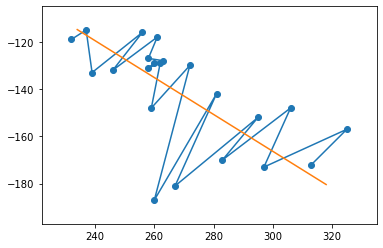

Run angle pre-adjustment: -52.031762254099775
Run direction: against
Run angle: 127.96823774590023
Run slope: -0.780393274133703


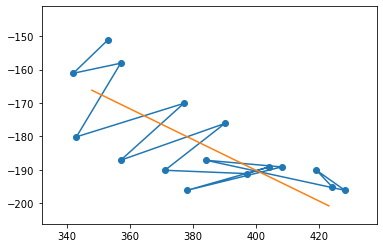

Run angle pre-adjustment: -65.27336361726667
Run direction: with
Run angle: 114.72663638273332
Run slope: -0.46051197278537953


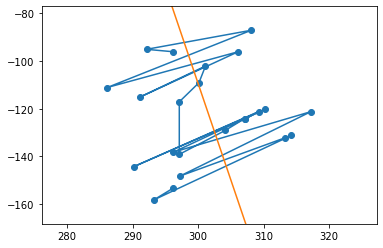

Run angle pre-adjustment: -7.046951706098032
Run direction: with
Run angle: 172.953048293902
Run slope: -8.089537531800842


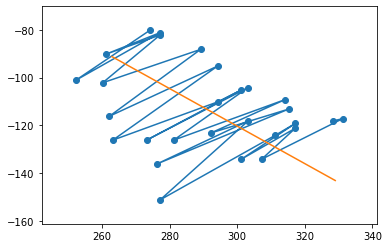

Run angle pre-adjustment: -51.851224168256124
Run direction: against
Run angle: 128.14877583174388
Run slope: -0.785475765177374


<Figure size 432x288 with 0 Axes>

In [46]:
dances = [WaggleDance(locs_orig_dir, file) for file in locs_orig_files]
k = 0

dance_angles_hat = []

for dance in dances:
    print("Plots for dance " + str(k))
    run_angles = []
    for run in get_runs_from_dance(dance):
        
        run_params = plot_run_with_fit(run)
        if run_params is None:
            continue
        x_0, x_f = run[0], run[-1]
        angle = angle_from_slope(run_params[0], x_0, x_f)
        direction = "with" if np.dot(np.array([run_params[0], 1]), np.array(x_f - x_0)) > 0 else "against"
        print("Run angle pre-adjustment: " + str(math.degrees(np.arctan(1/run_params[0]))))
        print("Run direction: " + direction)
        print("Run angle: " + str(math.degrees(angle)))
        print("Run slope: " + str(run_params[0]))
        run_angles.append(math.degrees(angle))
    dance_angles_hat.append(run_angles)
    k += 1

In [83]:
dance_angles_hat

[[-176.40801569514946, -178.28266297582562, -165.1016613343853]]

In [88]:
dance_angles = [pd.read_csv(runs_dir + file)[['RunAngle_Deg']].to_numpy().flatten() for file in runs_files]

In [20]:
errors_by_dance = []
for k in range(len(dance_angles_hat)):
    dance_pred = dance_angles_hat[k]
    dance_real = dance_angles[k]
    run_errors = []
    pdb.set_trace()
    for l in range(len(dance_pred)):
        diff = dance_pred[l] - dance_real[l]
        run_errors.append(diff)
    errors_by_dance.append(run_errors)
        

> /var/folders/rp/l9lr5qd56k33wdqb43jbf8bh0000gn/T/ipykernel_41434/3084534837.py(7)<module>()
      5     run_errors = []
      6     pdb.set_trace()
----> 7     for l in range(len(dance_pred)):
      8         diff = dance_pred[l] - dance_real[l]
      9         run_errors.append(diff)

ipdb> len(dance_real)
8
ipdb> len(dance_pred)
3
ipdb> c
> /var/folders/rp/l9lr5qd56k33wdqb43jbf8bh0000gn/T/ipykernel_41434/3084534837.py(7)<module>()
      5     run_errors = []
      6     pdb.set_trace()
----> 7     for l in range(len(dance_pred)):
      8         diff = dance_pred[l] - dance_real[l]
      9         run_errors.append(diff)

ipdb> len(dance_real)
5
ipdb> len(dance_pred)
6
ipdb> c


IndexError: index 5 is out of bounds for axis 0 with size 5

In [212]:
all_errors = []
for dance in errors_by_dance:
    for error in dance:
        if np.abs(error) < 90:
            all_errors.append(error)
all_errors = np.array(all_errors)

In [213]:
all_errors = all_errors[~np.isnan(all_errors)]


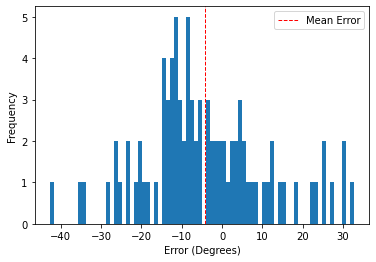

In [229]:
w = 1
n = math.ceil((all_errors.max() - all_errors.min())/w)
plt.hist(all_errors, bins=n)
plt.axvline(all_errors.mean(), color='red', linestyle='dashed', linewidth=1, label='Mean Error')
plt.xlabel('Error (Degrees)')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('error_dist_angles.png')


In [261]:
np.mean(all_errors)

-4.298941048719371

In [219]:
len(all_errors)

88

In [89]:
avg_errors = []
for k in range(len(dance_angles_hat)):
    curr_dance_runs = dance_angles_hat[k]
    if len(curr_dance_runs) % 2 != 0:
        curr_dance_runs = curr_dance_runs[:-1]
    avg = np.mean(curr_dance_runs)
    if np.abs(avg - metadata['AvgRunAngle_Deg'][k]) < 30:
        avg_errors.append(avg - metadata['AvgRunAngle_Deg'][k])
    

In [90]:
avg_errors = np.array(avg_errors)


w = 1
n = math.ceil((avg_errors.max() - avg_errors.min())/w)
plt.hist(avg_errors, bins=n)
plt.axvline(avg_errors.mean(), color='red', linestyle='dashed', linewidth=1, label='Mean Error')
plt.xlabel('Error (Degrees)')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('error_dist_full.png')

ValueError: zero-size array to reduction operation maximum which has no identity

In [91]:
avg_errors.mean()

/var/folders/rp/l9lr5qd56k33wdqb43jbf8bh0000gn/T/ipykernel_41434/4051110978.py:1: RuntimeWarning: Mean of empty slice.
  avg_errors.mean()
/opt/homebrew/Caskroom/miniforge/base/envs/CCTA/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [26]:
np.std(avg_errors)

6.700987181889433

In [243]:
dance_angles_hat[4]

[10.861166620530977, 29.53412670004887, 42.33829813698788, 165.63313195736444]

In [99]:
dances = [WaggleDance(locs_orig_dir, file) for file in locs_orig_files]

run_times_by_dance = []
k = 0

for dance in dances:
    run_times = []
    for run in get_runs_from_dance(dance):
        run_times.append(len(run)/metadata['FramesPerSec'][k])
    run_times_by_dance.append(np.mean(run_times))
    k+=1

In [103]:
run_times_by_dance[0]

0.8133333333333334

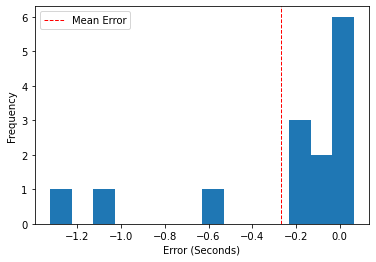

In [51]:
w = 0.1
n = math.ceil((run_time_errors.max() - run_time_errors.min())/w)
plt.hist(run_time_errors, bins=n)
plt.axvline(run_time_errors.mean(), color='red', linestyle='dashed', linewidth=1, label='Mean Error')
plt.xlabel('Error (Seconds)')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('error_dist_runtime.png')

In [52]:
run_time_errors.mean()

-0.2679665968335078

In [53]:
np.std(run_time_errors)

0.4194096656958266

-173.26411333512013

In [104]:
dance_angles = np.array([-170.2, -172.1])

In [110]:
np.mean(dance_angles_hat[:2]) - np.mean(dance_angles)

-2.1141133351201518

-3.0240292532464594

In [158]:
-1 / np.tan((np.pi / 180) * np.mean(dance_angles_hat[:2]))

-8.46682467060643